In [3]:
!pip install GoogleNews --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.8 MB/s eta 0:00:00


Google news API

In [4]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()

In [5]:
googlenews = GoogleNews(lang='en', region='IN')
googlenews.set_period('10d')  # Last 10 days news
googlenews.set_time_range('01/01/2025', '01/10/2025')

In [8]:
googlenews.search('misinformation')
googlenews.search('fake news')
googlenews.search('disinformation')
googlenews.search('propaganda')

In [9]:
googlenews.search('misinformation detection')
googlenews.search('fake news detection')
googlenews.search('combating misinformation')
googlenews.search('online disinformation')
googlenews.search('social media misinformation')

In [10]:
googlenews.search('election misinformation')
googlenews.search('covid-19 misinformation')

In [11]:
googlenews.search('intitle:misinformation')

In [12]:
results = googlenews.result()

In [13]:
for result in results:
  print(result['title'])
  print(result['link'])
  # Access other fields like description, date, etc.

The Flanders Audiovisual Fund releases a new report on the use of artificial intelligence in audiovisual creation
https://cineuropa.org/en/dossiernewsdetail/3108/473088/&ved=2ahUKEwjA3O2UjqCLAxXpD1kFHbTRF1MQxfQBegQIABAC&usg=AOvVaw0KpmUPW4UoDpUC9fbDWMTy
This Artificial Intelligence (AI) Stock Delivered Bigger Gains Than Nvidia. It Can Skyrocket Higher.
https://www.aol.com/artificial-intelligence-ai-stock-delivered-113000297.html&ved=2ahUKEwjA3O2UjqCLAxXpD1kFHbTRF1MQxfQBegQICRAC&usg=AOvVaw1hgdTy9CXl5LptshTvCtRh
UAE President visits Mohamed bin Zayed University of Artificial Intelligence
https://www.zawya.com/en/world/middle-east/uae-president-visits-mohamed-bin-zayed-university-of-artificial-intelligence-aqdxpf6q&ved=2ahUKEwjA3O2UjqCLAxXpD1kFHbTRF1MQxfQBegQIBRAC&usg=AOvVaw2HblaRITHOiNcUvtqoX9Uq
China's artificial intelligence (AI) chatbot, Dipshikbal Shock, hit the domestic stock market with s..
https://www.mk.co.kr/en/stock/11229828&ved=2ahUKEwjA3O2UjqCLAxXpD1kFHbTRF1MQxfQBegQIAhAC&usg=

In [14]:
from GoogleNews import GoogleNews
import pandas as pd
df = pd.DataFrame(results)

df.head(2)

,title,media,date,datetime,desc,link,img
0,The Flanders Audiovisual Fund releases a new r...,Cineuropa,9 minutes ago,2025-01-31 13:45:46.113214,The study asked about the intended and eventua...,https://cineuropa.org/en/dossiernewsdetail/310...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,This Artificial Intelligence (AI) Stock Delive...,AOL.com,2 minutes ago,2025-01-31 13:52:46.131547,Twilio (NYSE: TWLO) stock has been red-hot on ...,https://www.aol.com/artificial-intelligence-ai...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


NLP Process Initalization

In [15]:
!pip install nltk spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TOKENIZATION

In [17]:
import nltk
nltk.download('punkt_tab') # Download the missing data

for result in results:
  # Use 'desc' instead of 'description' to access the description
  text = result['title'] + ' ' + result.get('desc', '')
  words = word_tokenize(text)
  sentences = sent_tokenize(text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


STOP WORD REMOVAL

In [18]:
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if not w.lower() in stop_words]

PART OF SPEECH TAGGING

In [19]:
doc = nlp(text)
for token in doc:
  print(token.text, token.pos_)

How SCONJ
an DET
error NOUN
kicked VERB
off ADP
asylum NOUN
- PUNCT
seeker NOUN
visa NOUN
misinformation PROPN
News PROPN
Corp PROPN
tabloids NOUN
reported VERB
that SCONJ
Labor PROPN
had AUX
issued VERB
more ADJ
than ADP
20000 NUM
visas NOUN
to ADP
the DET
families NOUN
and CCONJ
partners NOUN
of ADP
asylum NOUN
seekers NOUN
who PRON
arrived VERB
by ADP
boat NOUN
. PUNCT


NER - NAMED ENTITY RECOGNITION

In [20]:
for ent in doc.ents:
  print(ent.text, ent.label_)

News Corp ORG
Labor ORG
more than 20000 CARDINAL


SENTIMENT ANALYSIS

In [21]:
!pip install textblob
from textblob import TextBlob

In [22]:
blob = TextBlob(text)
sentiment = blob.sentiment.polarity
print(sentiment) # Value between -1 (negative) and 1 (positive)

0.5


# Lemmatization with spaCy

In [23]:
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
# Download the correct resource for English POS tagging
nltk.download('averaged_perceptron_tagger_eng')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to process each news article
def process_news_article(text):
    # Tokenization
    words = word_tokenize(text)
    sentences = sent_tokenize(text)

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_words = [w for w in words if not w.lower() in stop_words]

    # POS tagging with NLTK
    pos_tags = nltk.pos_tag(filtered_words)

    # NER and sentiment analysis with spaCy
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    sentiment = TextBlob(text).sentiment.polarity

    # Lemmatization with spaCy
    lemmas = [token.lemma_ for token in doc]

    return {
        'words': words,
        'sentences': sentences,
        'filtered_words': filtered_words,
        'pos_tags': pos_tags,
        'entities': entities,
        'sentiment': sentiment,
        'lemmas': lemmas
    }

# Apply the processing function to the 'title' column of the DataFrame
df['nlp_results'] = df['title'].apply(process_news_article)

# View the updated DataFrame
df.head(2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


,title,media,date,datetime,desc,link,img,nlp_results
0,The Flanders Audiovisual Fund releases a new r...,Cineuropa,9 minutes ago,2025-01-31 13:45:46.113214,The study asked about the intended and eventua...,https://cineuropa.org/en/dossiernewsdetail/310...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...","{'words': ['The', 'Flanders', 'Audiovisual', '..."
1,This Artificial Intelligence (AI) Stock Delive...,AOL.com,2 minutes ago,2025-01-31 13:52:46.131547,Twilio (NYSE: TWLO) stock has been red-hot on ...,https://www.aol.com/artificial-intelligence-ai...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...","{'words': ['This', 'Artificial', 'Intelligence..."


In [24]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
  doc = nlp(text)
  lemmas = [token.lemma_ for token in doc]
  return " ".join(lemmas)  # Join lemmas back into a string

# Apply lemmatization to the 'title' column of your DataFrame
df['lemmatized_title'] = df['title'].apply(lemmatize_text)
print(df.head(2))

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


                                               title      media  \
0  The Flanders Audiovisual Fund releases a new r...  Cineuropa   
1  This Artificial Intelligence (AI) Stock Delive...    AOL.com   

            date                   datetime  \
0  9 minutes ago 2025-01-31 13:45:46.113214   
1  2 minutes ago 2025-01-31 13:52:46.131547   

                                                desc  \
0  The study asked about the intended and eventua...   
1  Twilio (NYSE: TWLO) stock has been red-hot on ...   

                                                link  \
0  https://cineuropa.org/en/dossiernewsdetail/310...   
1  https://www.aol.com/artificial-intelligence-ai...   

                                                 img  \
0  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   
1  data:image/gif;base64,R0lGODlhAQABAIAAAP//////...   

                                         nlp_results  \
0  {'words': ['The', 'Flanders', 'Audiovisual', '...   
1  {'words': ['This', 'Artificial', '

# NER

In [30]:
import pandas as pd

# Create a new DataFrame to store entities
entities_df = pd.DataFrame(columns=['Title', 'Entity', 'Label'])

# Iterate through your original DataFrame
for index, row in df.iterrows():
    title = row['title']
    # Access the 'entities' from the 'nlp_results' column
    entities = row['nlp_results']['entities']

    # Add each entity to the new DataFrame
    for entity, label in entities:
        entities_df = pd.concat([entities_df, pd.DataFrame({'Title': [title], 'Entity': [entity], 'Label': [label]})], ignore_index=True)


In [31]:
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

# Download required NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # For POS tagging

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def process_news_article(text):
    # Tokenization
    words = word_tokenize(text)
    sentences = sent_tokenize(text)

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_words = [w for w in words if not w.lower() in stop_words]

    # POS tagging with NLTK
    pos_tags = nltk.pos_tag(filtered_words)

    # NER and sentiment analysis with spaCy
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    sentiment = TextBlob(text).sentiment.polarity

    # Lemmatization with spaCy
    lemmas = [token.lemma_ for token in doc]

    return {
        'words': words,
        'sentences': sentences,
        'filtered_words': filtered_words,
        'pos_tags': pos_tags,
        'entities': entities,
        'sentiment': sentiment,
        'lemmas': lemmas
    }

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [32]:
# Apply the processing function to the 'title' column
df['nlp_results'] = df['title'].apply(process_news_article)

# Create a list to store all NLP results
all_nlp_results = []

# Iterate and extract data
for index, row in df.iterrows():
    nlp_results = row['nlp_results']
    title = row['title']

    # Create a dictionary for each row
    row_data = {
        'Title': title,
        'Words': nlp_results['words'],
        'Sentences': nlp_results['sentences'],
        'Filtered_Words': nlp_results['filtered_words'],
        'POS_Tags': nlp_results['pos_tags'],
        'Entities': nlp_results['entities'],
        'Sentiment': nlp_results['sentiment'],
        'Lemmas': nlp_results['lemmas']
    }
    all_nlp_results.append(row_data)

all_nlp_df = pd.DataFrame(all_nlp_results)
all_nlp_df.to_csv('GoogleApi_Nlp_results.csv', index=False)

# CSV FOR POWER BI VISUALIZATIONS

In [33]:
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd

# ... (your existing code for NLP processing) ...

# Create a list to store all NLP results
all_nlp_results = []

# Iterate and extract data
for index, row in df.iterrows():
    nlp_results = row['nlp_results']
    title = row['title']

    # Create a dictionary for each row
    row_data = {
        'Title': title,
        'Sentiment': nlp_results['sentiment'],
        # ... other individual NLP results you want to include ...
    }

    # Create separate rows for each entity
    for entity, label in nlp_results['entities']:
        entity_row = row_data.copy()  # Copy the base row data
        entity_row['Entity'] = entity
        entity_row['Label'] = label
        all_nlp_results.append(entity_row)

# Create a DataFrame from the list of results
all_nlp_df = pd.DataFrame(all_nlp_results)

# Save to CSV
all_nlp_df.to_csv('power_bi_nlp_results.csv', index=False)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Google News API data
google_news_df = pd.read_csv('power_bi_nlp_results.csv')

# Descriptive Statistics
print("Descriptive Statistics for Google News Data:")
print(google_news_df.describe())

Descriptive Statistics for Google News Data:
        Sentiment
count  173.000000
mean    -0.072118
std      0.241974
min     -0.600000
25%     -0.166667
50%      0.000000
75%      0.000000
max      0.550000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

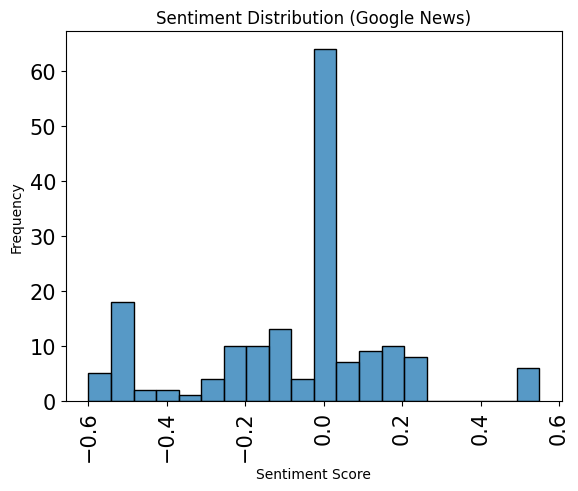

In [56]:
# Sentiment Distribution
from google.colab import files
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
sns.histplot(google_news_df['Sentiment'])
plt.title('Sentiment Distribution (Google News)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.xticks(rotation=90)  # Rotate x-axis labels before saving
plt.savefig("authfig1.pdf", bbox_inches='tight')
files.download("authfig1.pdf")
plt.show()  # Display the figure after saving

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

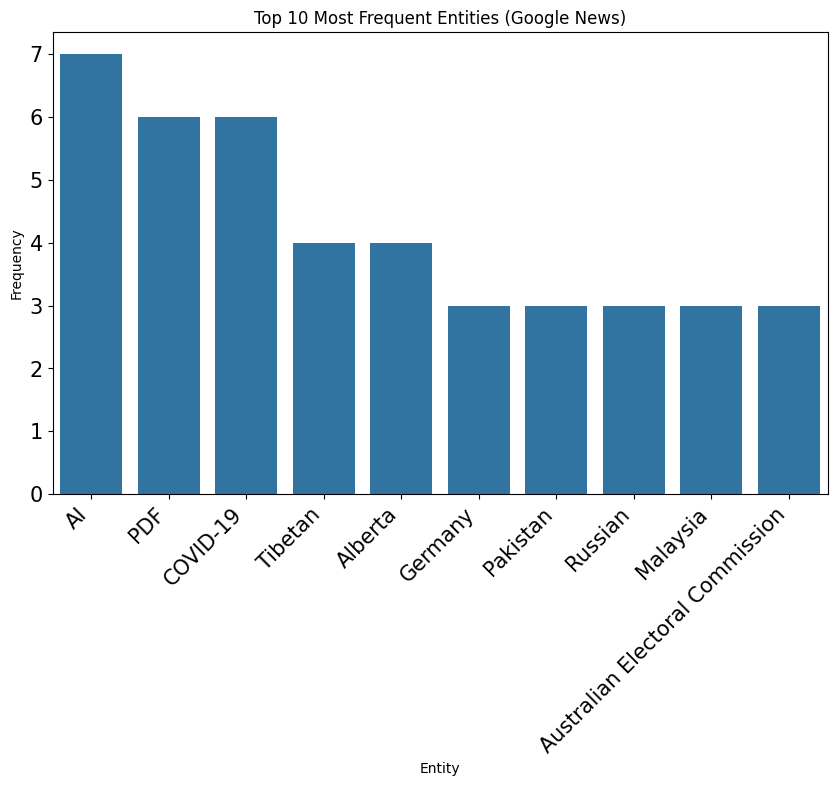

In [57]:
# Entity Frequency
from google.colab import files
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
plt.figure(figsize=(10, 6))
entity_counts = google_news_df['Entity'].value_counts().head(10)
sns.barplot(x=entity_counts.index, y=entity_counts.values)
plt.title('Top 10 Most Frequent Entities (Google News)')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.savefig("authfig2.pdf", bbox_inches='tight')
files.download("authfig2.pdf")
plt.show()  # Display the figure after saving

ACCESSING THE SOCIAL API

In [38]:
!pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.4 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=eb6e977e6fc337b2b394ad17c0cd077503ee53128bd1ab3600df641990e0a2f2
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [39]:
import feedparser

# RSS feed URL
feed_url = "http://feeds.bbci.co.uk/news/rss.xml"  # Example: BBC News feed

# Fetch and parse the RSS feed
feed = feedparser.parse(feed_url)

# Process feed entries (articles)
for entry in feed.entries:
    # Extract relevant information
    title = entry.title
    link = entry.link
    published_date = entry.published  # or entry.updated

    # Process the content (e.g., apply NLP techniques)
    # This is where you would integrate your misinformation detection logic

    # Print or store the extracted information
    print(f"Title: {title}")
    print(f"Link: {link}")
    print(f"Published: {published_date}")
    print("-" * 20)

Title: Sara Sharif family court judges named after appeal
Link: https://www.bbc.com/news/articles/cd9qzn70nn8o
Published: Fri, 31 Jan 2025 11:27:10 GMT
--------------------
Title: Woman's body found in search for missing sisters last seen in Aberdeen
Link: https://www.bbc.com/news/articles/c3vp1n20px6o
Published: Fri, 31 Jan 2025 12:57:35 GMT
--------------------
Title: Teenage skaters, a young pilot and a professor - the victims of DC plane crash
Link: https://www.bbc.com/news/articles/cwyjpwxx22ko
Published: Fri, 31 Jan 2025 13:38:50 GMT
--------------------
Title: Prince Andrew emails show contact with Epstein lasted beyond 2010
Link: https://www.bbc.com/news/articles/cp8qz22dqdzo
Published: Fri, 31 Jan 2025 13:10:12 GMT
--------------------
Title: English farmland could be cut by 9% to hit green targets
Link: https://www.bbc.com/news/articles/c4gpv0qx9wxo
Published: Fri, 31 Jan 2025 13:59:21 GMT
--------------------
Title: Faisal Islam: The 'Iron Chancellor' will have to flex to ge

## BBC News feed

In [40]:
import feedparser
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

# Download required NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # For POS tagging

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# RSS feed URL
feed_url = "http://feeds.bbci.co.uk/news/rss.xml"  # Example: BBC News feed

# Fetch and parse the RSS feed
feed = feedparser.parse(feed_url)

# Process feed entries (articles)
for entry in feed.entries:
    # Extract text content (e.g., from 'title' and 'summary')
    text = entry.title + " " + entry.summary

    # 1. Tokenization
    words = word_tokenize(text)
    sentences = sent_tokenize(text)

    # 2. Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_words = [w for w in words if not w.lower() in stop_words]

    # 3. POS tagging with NLTK
    pos_tags = nltk.pos_tag(filtered_words)

    # 4. NER and sentiment analysis with spaCy
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    sentiment = TextBlob(text).sentiment.polarity

    # 5. Lemmatization with spaCy
    lemmas = [token.lemma_ for token in doc]

    # Print or store the extracted information and NLP results
    print(f"Title: {entry.title}")
    print(f"Summary: {entry.summary}")
    print(f"Sentiment: {sentiment}")
    print(f"Entities: {entities}")
    print(f"Words: {words}")
    print(f"Sentences: {sentences}")
    print(f"Filtered Words: {filtered_words}")
    print(f"POS Tags: {pos_tags}")
    print(f"Lemmas: {lemmas}")
    print("-" * 20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Title: Sara Sharif family court judges named after appeal
Summary: Judges who oversaw Family Court hearings before Sara was murdered have been named after an appeal by the BBC and others.
Sentiment: 0.0
Entities: [('Sara Sharif', 'PERSON'), ('Family Court', 'ORG'), ('Sara', 'PERSON'), ('BBC', 'ORG')]
Words: ['Sara', 'Sharif', 'family', 'court', 'judges', 'named', 'after', 'appeal', 'Judges', 'who', 'oversaw', 'Family', 'Court', 'hearings', 'before', 'Sara', 'was', 'murdered', 'have', 'been', 'named', 'after', 'an', 'appeal', 'by', 'the', 'BBC', 'and', 'others', '.']
Sentences: ['Sara Sharif family court judges named after appeal Judges who oversaw Family Court hearings before Sara was murdered have been named after an appeal by the BBC and others.']
Filtered Words: ['Sara', 'Sharif', 'family', 'court', 'judges', 'named', 'appeal', 'Judges', 'oversaw', 'Family', 'Court', 'hearings', 'Sara', 'murdered', 'named', 'appeal', 'BBC', 'others', '.']
POS Tags: [('Sara', 'NNP'), ('Sharif', 'NNP'

In [41]:
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd

# Create a list to store all NLP results
all_nlp_results = []

# Iterate and extract data
for index, entry in enumerate(feed.entries):  # Use enumerate for unique index
    # Extract text content (e.g., from 'title' and 'summary')
    text = entry.title + " " + entry.summary

    # ... (your existing NLP processing code to get 'sentiment', 'entities', etc.) ...

    # Create a dictionary for each row
    row_data = {
        'Index': index + 1,  # Add a unique index for each row
        'Title': entry.title,
        'Summary': entry.summary,
        'Sentiment': sentiment,
    }

    # Create separate rows for each entity
    for entity, label in entities:
        entity_row = row_data.copy()
        entity_row['Entity'] = entity
        entity_row['Label'] = label
        all_nlp_results.append(entity_row)

# Create a DataFrame from the list of results
all_nlp_df = pd.DataFrame(all_nlp_results)

# Save to CSV
all_nlp_df.to_csv('rss_feed_nlp_results_for_power_bi.csv', index=False)

In [42]:
import feedparser
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd

# Create a list to store all NLP results for BBC News feed
bbc_nlp_results = []

# Iterate and extract data for BBC News feed
for index, entry in enumerate(feed.entries):  # Use enumerate for unique index
    # Extract text content (e.g., from 'title' and 'summary')
    text = entry.title + " " + entry.summary

    # Create a dictionary for each row
    row_data = {
        'Index': index + 1,  # Add a unique index for each row
        'Title': entry.title,
        'Summary': entry.summary,
        'Sentiment': sentiment,
    }

    # Create separate rows for each entity
    for entity, label in entities:
        entity_row = row_data.copy()
        entity_row['Entity'] = entity
        entity_row['Label'] = label
        bbc_nlp_results.append(entity_row)

# Create a DataFrame from the list of results for BBC News feed
bbc_nlp_df = pd.DataFrame(bbc_nlp_results)

# Save to CSV
bbc_nlp_df.to_csv('bbc_news_feed_nlp_results_for_power_bi.csv', index=False)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load BBC News feed data
bbc_news_df = pd.read_csv('bbc_news_feed_nlp_results_for_power_bi.csv')

# Descriptive Statistics
print("Descriptive Statistics for BBC News Data:")
print(bbc_news_df.describe())

Descriptive Statistics for BBC News Data:
            Index     Sentiment
count  385.000000  3.850000e+02
mean    18.000000 -4.166667e-01
std     10.112647  3.890837e-16
min      1.000000 -4.166667e-01
25%      9.000000 -4.166667e-01
50%     18.000000 -4.166667e-01
75%     27.000000 -4.166667e-01
max     35.000000 -4.166667e-01


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

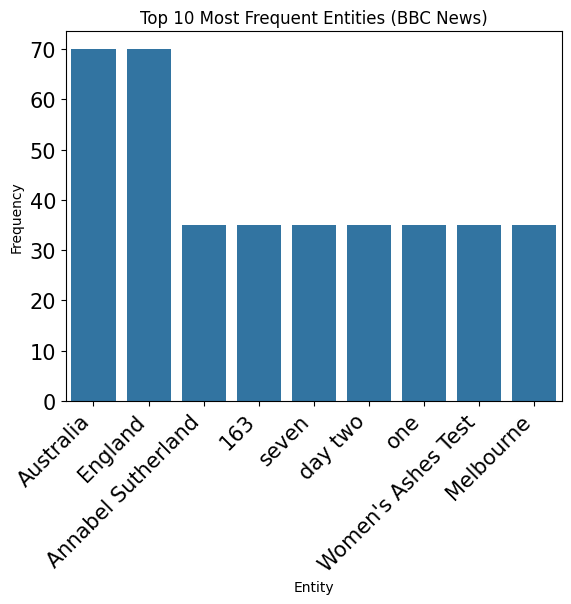

In [58]:
# Entity Frequency
from google.colab import files
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)

entity_counts = bbc_news_df['Entity'].value_counts().head(10)
sns.barplot(x=entity_counts.index, y=entity_counts.values)
plt.title('Top 10 Most Frequent Entities (BBC News)')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.savefig("authfig3.pdf", bbox_inches='tight')  # Save as PDF
files.download("authfig3.pdf")  # Download (if in Colab)
plt.show()  # Display after saving

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

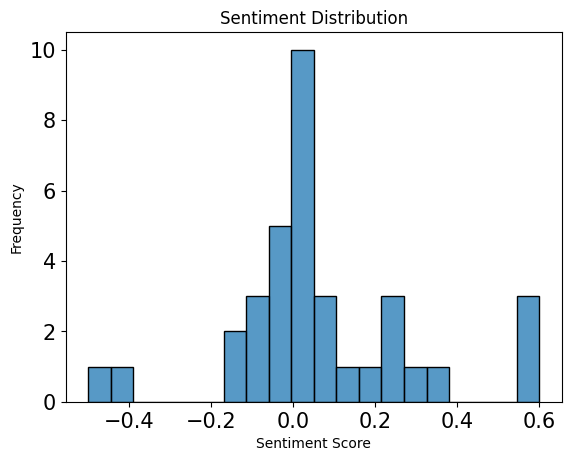

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast  # For converting string representations of lists back to lists
from google.colab import files

# Load the data
all_nlp_df = pd.read_csv('bbc_news_feed_nlp_results_for_power_bi.csv', converters={'Words': ast.literal_eval,
                                                        'Sentences': ast.literal_eval,
                                                        'Filtered_Words': ast.literal_eval,
                                                        'POS_Tags': ast.literal_eval,
                                                        'Entities': ast.literal_eval,
                                                        'Lemmas': ast.literal_eval})

# 1. Sentiment Distribution
#plt.figure(figsize=(8, 6))
sns.histplot(all_nlp_df['sentiment'], bins=20)

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.savefig("authfig4.pdf", bbox_inches='tight')
files.download("authfig4.pdf")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

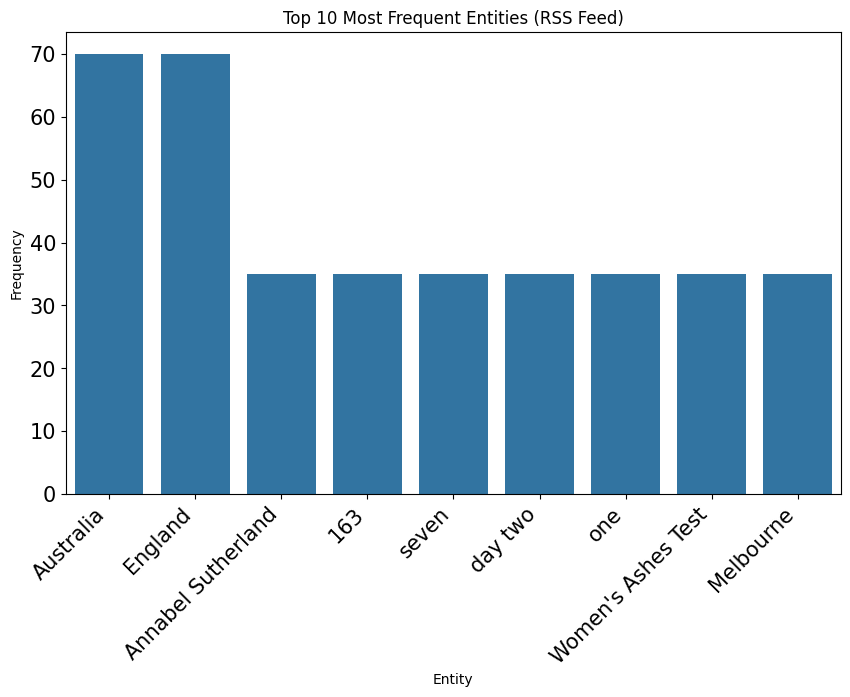

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load RSS feed data
rss_feed_df = pd.read_csv('rss_feed_nlp_results_for_power_bi.csv')  # Assuming you saved it as 'rss_feed_data.csv'

# Improve plot quality
matplotlib.rcParams['pdf.fonttype'] = 42  # Use Type 1 fonts for better quality
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('xtick', labelsize=15)  # Increase font size of x-axis labels
matplotlib.rc('ytick', labelsize=15)  # Increase font size of y-axis labels

# Entity Frequency
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
entity_counts = rss_feed_df['Entity'].value_counts().head(10)
sns.barplot(x=entity_counts.index, y=entity_counts.values)
plt.title('Top 10 Most Frequent Entities (RSS Feed)')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Save as PDF with tight bounding box
plt.savefig("authfig5.pdf", bbox_inches='tight')
files.download("authfig5.pdf")  # Download (if in Colab)

plt.show()  # Display after saving

In [78]:
import feedparser
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd

# 1. Download NLTK Resources and Load spaCy Model
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load("en_core_web_sm")

# 2. Define NLP Processing Function
def process_text(text):
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [w for w in words if not w.lower() in stop_words]
    pos_tags = nltk.pos_tag(filtered_words)
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    sentiment = TextBlob(text).sentiment.polarity
    lemmas = [token.lemma_ for token in doc]
    return {
        'words': words, 'sentences': sentences, 'filtered_words': filtered_words,
        'pos_tags': pos_tags, 'entities': entities, 'sentiment': sentiment,
        'lemmas': lemmas
    }

# 3. Process BBC News Feed and Create DataFrame
feed_url = "http://feeds.bbci.co.uk/news/rss.xml"
feed = feedparser.parse(feed_url)
bbc_nlp_results = [{
    'Index': i + 1, 'Title': entry.title, 'Summary': entry.summary,
    **process_text(entry.title + " " + entry.summary)  # Apply NLP function
} for i, entry in enumerate(feed.entries)]
bbc_nlp_df = pd.DataFrame(bbc_nlp_results)
bbc_nlp_df.to_csv('bbc_news_feed_nlp_results_for_power_bi.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

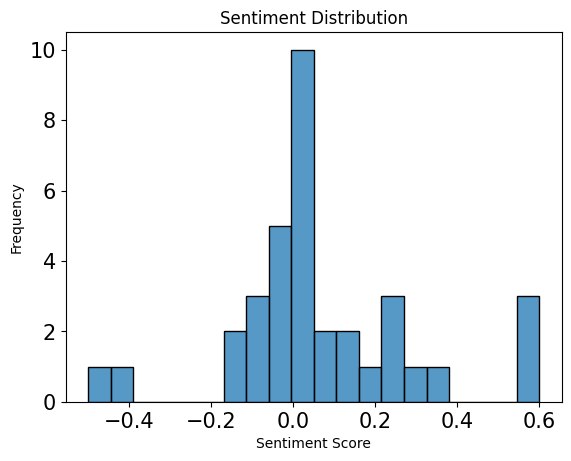

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast  # For converting string representations of lists back to lists
from google.colab import files

# Load the data
all_nlp_df = pd.read_csv('bbc_news_feed_nlp_results_for_power_bi.csv', converters={'Words': ast.literal_eval,
                                                        'Sentences': ast.literal_eval,
                                                        'Filtered_Words': ast.literal_eval,
                                                        'POS_Tags': ast.literal_eval,
                                                        'Entities': ast.literal_eval,
                                                        'Lemmas': ast.literal_eval})

# 1. Sentiment Distribution
#plt.figure(figsize=(8, 6))
sns.histplot(all_nlp_df['sentiment'], bins=20)

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.savefig("authfig4.pdf", bbox_inches='tight')
files.download("authfig4.pdf")
plt.show()

In [80]:
import feedparser
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd

# 1. Download NLTK Resources and Load spaCy Model
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load("en_core_web_sm")

# 2. Define NLP Processing Function
def process_text(text):
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [w for w in words if not w.lower() in stop_words]
    pos_tags = nltk.pos_tag(filtered_words)
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    sentiment = TextBlob(text).sentiment.polarity
    lemmas = [token.lemma_ for token in doc]
    return {
        'words': words, 'sentences': sentences, 'filtered_words': filtered_words,
        'pos_tags': pos_tags, 'entities': entities, 'sentiment': sentiment,
        'lemmas': lemmas
    }

# 3. Process BBC News Feed and Create DataFrame
feed_url = "http://feeds.bbci.co.uk/news/rss.xml"
feed = feedparser.parse(feed_url)
bbc_nlp_results = [{
    'Index': i + 1, 'Title': entry.title, 'Summary': entry.summary,
    **process_text(entry.title + " " + entry.summary)  # Apply NLP function
} for i, entry in enumerate(feed.entries)]
bbc_nlp_df = pd.DataFrame(bbc_nlp_results)
bbc_nlp_df.to_csv('bbc_news_feed_nlp_results_for_power_bi.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
